<h1>Heritage Health</h1>

In [1]:
#Importing libraries

import numpy as np
import pandas as pd

<h2>Data Processing</h2>

We are gonna take first take a look at the claims table and do some preprocessing.

In [2]:
claims = pd.read_csv("HeritageHealth/HHP_release3/Claims.csv")

In [3]:
claims.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


In [4]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MemberID               int64  
 1   ProviderID             float64
 2   Vendor                 float64
 3   PCP                    float64
 4   Year                   object 
 5   Specialty              object 
 6   PlaceSvc               object 
 7   PayDelay               object 
 8   LengthOfStay           object 
 9   DSFS                   object 
 10  PrimaryConditionGroup  object 
 11  CharlsonIndex          object 
 12  ProcedureGroup         object 
 13  SupLOS                 int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB


In [5]:
claims["LengthOfStay"].unique()

array([nan, '1 day', '2- 4 weeks', '2 days', '3 days', '4 days',
       '1- 2 weeks', '4- 8 weeks', '6 days', '5 days', '26+ weeks'],
      dtype=object)

Converting every non-numeric & range variable to numeric:

In [6]:
year = {"Y1": 1, "Y2": 2, "Y3": 3}

claims["Year"] = claims["Year"].replace(to_replace=year)

In [7]:
dfds = {"0- 1 month": 1, "1- 2 months": 2, "2- 3 months": 3, "3- 4 months": 4, "4- 5 months": 5, "5- 6 months": 6, 
        "6- 7 months": 7, "7- 8 months": 8, "8- 9 months": 9, "9- 10 months": 10,"9-10 months": 10, "10- 11 months": 11,
        "10-11 months": 11, "11- 12 months": 12, "11-12 months": 12}

claims["DSFS"] = claims["DSFS"].replace(to_replace=dfds)
claims["DSFS"] = claims["DSFS"].fillna(0)

In [8]:
los = {"1 day": 1, "2 days": 2, "3 days": 3, "4 days": 4, "5 days": 5, "6 days": 6, "1- 2 weeks": 14, 
       "2- 4 weeks": 28, "4- 8 weeks": 56, "26+ weeks": 182}

claims["LengthOfStay"] = claims["LengthOfStay"].replace(to_replace=los)
claims["LengthOfStay"] = claims["LengthOfStay"].fillna(0)

In [9]:
ci = {"0": 0, "1-2": 2, "3-4": 4, "5+": 5}

claims["CharlsonIndex"] = claims["CharlsonIndex"].replace(to_replace=ci)

In [10]:
claims["PayDelay"] = claims["PayDelay"].replace(to_replace={"162+": 162})
claims["PayDelay"] = pd.to_numeric(claims["PayDelay"])

claims

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,1,Surgery,Office,28,0.0,9.0,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,3,Internal,Office,50,0.0,8.0,NEUMENT,2,EM,0
2,2759427,2997752.0,140343.0,91972.0,3,Internal,Office,14,0.0,1.0,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,3,Laboratory,Independent Lab,24,0.0,6.0,METAB3,2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,2,Surgery,Outpatient Hospital,27,0.0,5.0,FXDISLC,2,EM,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,14932948,6641119.0,693028.0,22193.0,2,Obstetrics and Gynecology,Inpatient Hospital,58,0.0,1.0,GYNEC1,0,EM,0
2668986,31248189,6932712.0,223304.0,70748.0,3,Internal,Inpatient Hospital,23,0.0,1.0,GIBLEED,2,EM,0
2668987,43767339,1483429.0,35565.0,5278.0,3,Diagnostic Imaging,Office,122,0.0,5.0,ODaBNCA,0,SIS,0
2668988,96393713,7094351.0,347045.0,93075.0,3,Internal,Office,151,0.0,2.0,METAB3,2,EM,0


In the cell below we are checking where we could find missing values and discuss how we could deal with missing values.

In [12]:
claims.isna().sum()

MemberID                     0
ProviderID                   0
Vendor                       0
PCP                          0
Year                         0
Specialty                 8405
PlaceSvc                  7632
PayDelay                     0
LengthOfStay                 0
DSFS                         0
PrimaryConditionGroup    11410
CharlsonIndex                0
ProcedureGroup            3675
SupLOS                       0
dtype: int64

The following variables are categorical with several distinct categories:
- Specialty              
- PlaceSvc               
- PrimaryConditionGroup
- ProcedureGroup        

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# list of columns to be encoded
columns_to_encode = ["Specialty", "PlaceSvc", "PrimaryConditionGroup", "ProcedureGroup"]

# UN-COMMENT FOR ONE-HOT

# # instantiate the one-hot encoder
# ohe = OneHotEncoder()

# # fit and transform the one-hot encoder on the selected columns
# encoded_df = ohe.fit_transform(df[columns_to_encode]).toarray()

# # create a new dataframe with the encoded columns
# encoded_df = pd.DataFrame(encoded_df, columns=ohe.get_feature_names(columns_to_encode))

# # concatenate the original dataframe with the encoded dataframe
# claims = pd.concat([claims.drop(columns_to_encode, axis=1), encoded_df], axis=1)

# UN-COMMENT FOR LABEL
# instantiate the label encoder
le = LabelEncoder()

# fit and transform the label encoder on the selected columns
claims[columns_to_encode] = claims[columns_to_encode].apply(lambda col: le.fit_transform(col))

In [14]:
# Dropping unnecessary columns
#claims = claims.drop("ProviderID", axis=1)
# claims = claims.drop("MemberID", axis=1)
claims

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,1,11,4,28,0.0,9.0,27,0,2,0
1,97903248,3316066.0,726296.0,5300.0,3,4,4,50,0.0,8.0,27,2,1,0
2,2759427,2997752.0,140343.0,91972.0,3,4,4,14,0.0,1.0,22,0,1,0
3,73570559,7053364.0,240043.0,70119.0,3,5,2,24,0.0,6.0,22,2,6,0
4,11837054,7557061.0,496247.0,68968.0,2,11,6,27,0.0,5.0,10,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,14932948,6641119.0,693028.0,22193.0,2,6,3,58,0.0,1.0,13,0,1,0
2668986,31248189,6932712.0,223304.0,70748.0,3,4,3,23,0.0,1.0,11,2,1,0
2668987,43767339,1483429.0,35565.0,5278.0,3,1,4,122,0.0,5.0,28,0,10,0
2668988,96393713,7094351.0,347045.0,93075.0,3,4,4,151,0.0,2.0,22,2,1,0


In [15]:
duplicateRows = claims[claims.duplicated(['MemberID'])]

duplicateRowsMember = claims.loc[claims['MemberID'] == 58458320, :]

claims = claims.drop_duplicates(subset= ['MemberID', 'Year', 'PrimaryConditionGroup'])

claims_agg = claims.groupby(['Year', 'MemberID']).agg({
    'ProviderID': ['count', 'nunique'],
    'PrimaryConditionGroup': 'nunique',
    'PayDelay': ['min', 'max', 'sum'],
    'CharlsonIndex': ['max'],
    'ProcedureGroup': ['nunique'],
    
}).reset_index()

claims_agg.columns = ["Year", "MemberID", "ClaimsCount", "ProviderCount", "PrimaryConditionGroupCount", 
                      "MinPayDelay", "MaxPayDelay", "TotalPayDelay", "MaxCharlsonIndex", "UniqueProcedureGroup"]

claims_agg

,Year,MemberID,ClaimsCount,ProviderCount,PrimaryConditionGroupCount,MinPayDelay,MaxPayDelay,TotalPayDelay,MaxCharlsonIndex,UniqueProcedureGroup
0,1,210,4,3,4,22,162,327,0,3
1,1,3197,2,2,2,42,162,204,0,1
2,1,3889,5,5,5,36,156,316,2,4
3,1,4187,3,2,3,30,162,311,0,2
4,1,9063,1,1,1,67,67,67,0,1
...,...,...,...,...,...,...,...,...,...,...
218410,3,99987030,3,2,3,0,0,0,0,2
218411,3,99992565,2,1,2,24,30,54,0,1
218412,3,99993334,1,1,1,22,22,22,0,1
218413,3,99995391,11,6,11,0,65,368,0,5


In [16]:
claims_agg.loc[claims_agg['MemberID']==210]

,Year,MemberID,ClaimsCount,ProviderCount,PrimaryConditionGroupCount,MinPayDelay,MaxPayDelay,TotalPayDelay,MaxCharlsonIndex,UniqueProcedureGroup
0,1,210,4,3,4,22,162,327,0,3
76039,2,210,2,2,2,31,38,69,0,2
147473,3,210,2,2,2,23,41,64,0,2


Starting the analysis by looking at a correlation matrix between the different features

<Axes: >

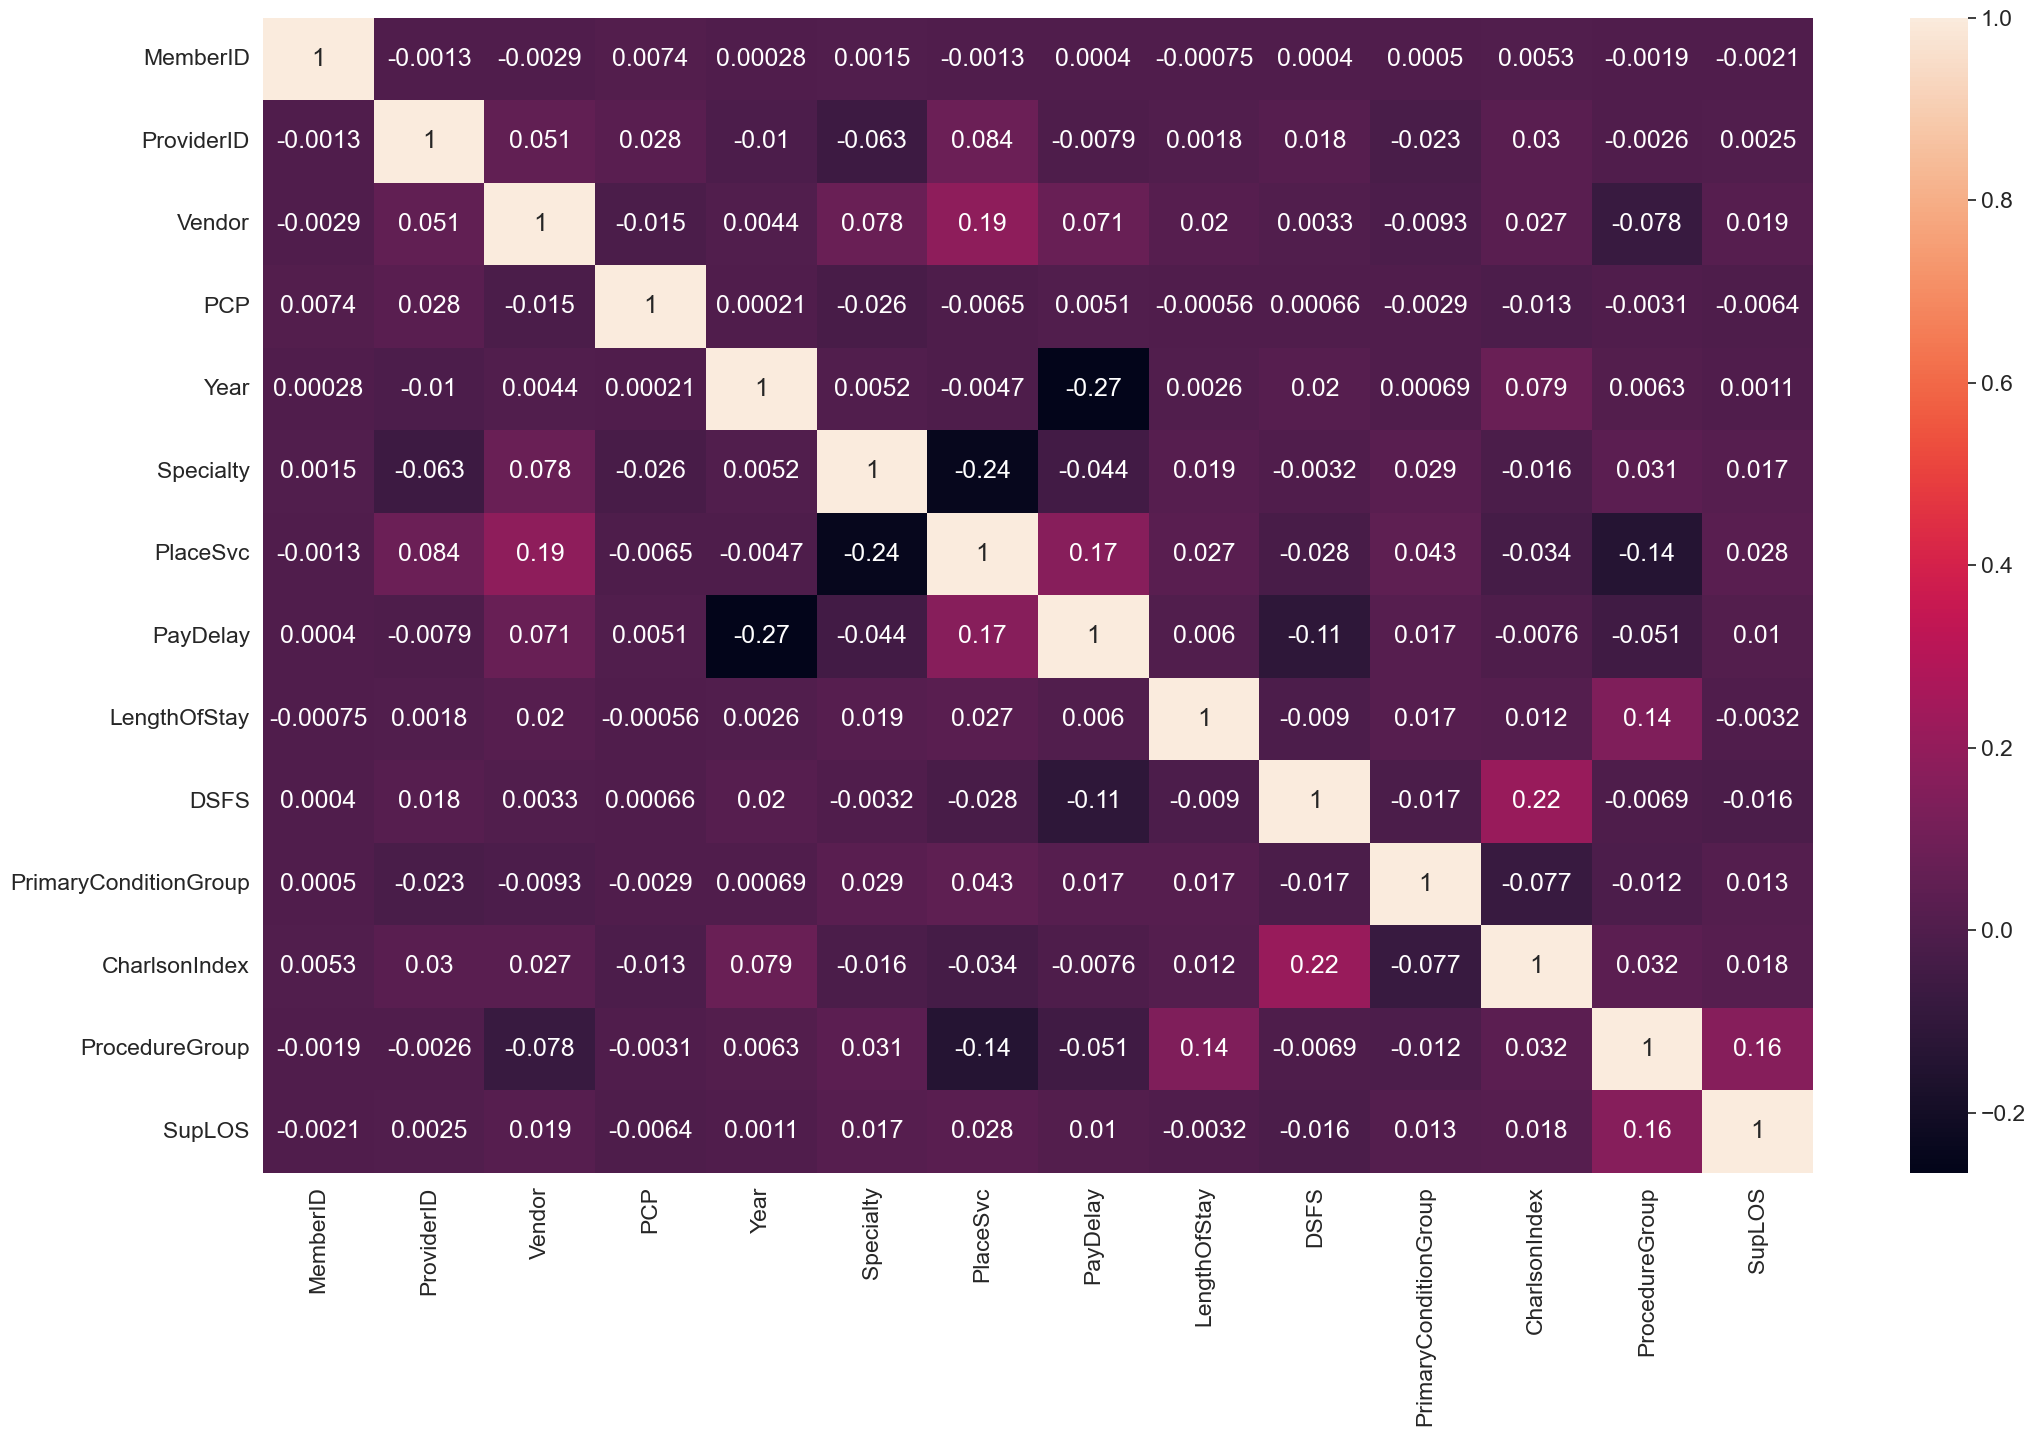

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
sns.set(font_scale=1.5)
sns.heatmap(claims.corr(), annot=True)

Next we are loading in the days in hospital data

In [18]:
days_y2 = pd.read_csv("HeritageHealth/HHP_release3/DaysInHospital_Y2.csv")
days_y2["Year"] = 2
days_y2

,MemberID,ClaimsTruncated,DaysInHospital,Year
0,24027423,0,0,2
1,98324177,0,0,2
2,33899367,1,1,2
3,5481382,0,1,2
4,69908334,0,0,2
...,...,...,...,...
76033,1702326,0,0,2
76034,31530440,0,0,2
76035,87102780,0,0,2
76036,74032946,0,0,2


In [19]:
days_y3 = pd.read_csv("HeritageHealth/HHP_release3/DaysInHospital_Y3.csv")
days_y3["Year"] = 3
days_y3

,MemberID,ClaimsTruncated,DaysInHospital,Year
0,90963501,0,0,3
1,85160905,0,0,3
2,45496648,0,0,3
3,45162557,0,0,3
4,68793937,0,0,3
...,...,...,...,...
71430,206785,0,0,3
71431,93465383,0,0,3
71432,57466586,0,0,3
71433,57283229,0,0,3


In [20]:
days_y2["DaysInHospital"].value_counts()

0     64269
1      4835
2      2366
3      1453
4       977
5       565
6       373
15      261
7       256
8       173
9       148
10      106
11       80
12       73
13       61
14       42
Name: DaysInHospital, dtype: int64

In [21]:
days = pd.concat([days_y2, days_y3])
days.loc[days["MemberID"]==210]

,MemberID,ClaimsTruncated,DaysInHospital,Year
63884,210,0,0,2
57333,210,0,0,3


We are also looking at the members data. This table consists of three feautres: MemberID, AgeAtFirstClaim and Sex.

In [22]:
members = pd.read_csv("HeritageHealth/HHP_release3/Members.csv")
members.isna().sum()

MemberID               0
AgeAtFirstClaim     5753
Sex                17552
dtype: int64

What we can see it that we have many missing values for both AgeAtFirstClaim and Sex. 

In [23]:
ageGroups = {"0-9": 0, "10-19": 10, "20-29": 20, "30-39": 30, "40-49": 40, "50-59": 50, 
        "60-69": 60, "70-79": 70, "80+": 80}
sex = {"M": 2, "F": 1, "N": 0}

members["AgeAtFirstClaim"] = members["AgeAtFirstClaim"].replace(to_replace=ageGroups)
members["AgeAtFirstClaim"] = members["AgeAtFirstClaim"] .fillna(-1)

members["Sex"] = members["Sex"].fillna("N")
members["Sex"] = members["Sex"].replace(to_replace=sex)

members

,MemberID,AgeAtFirstClaim,Sex
0,14723353,70.0,2
1,75706636,70.0,2
2,17320609,70.0,2
3,69690888,40.0,2
4,33004608,0.0,2
...,...,...,...
112995,99711514,40.0,1
112996,31690877,50.0,1
112997,9519985,30.0,1
112998,92806272,50.0,1


Processing the labcount data

In [24]:
labs = pd.read_csv("HeritageHealth/HHP_release3/LabCount.csv")
labs["DSFS"] = labs["DSFS"].replace(to_replace=dfds)
labs["DSFS"] = labs["DSFS"].fillna(0)
labs["LabCount"] = labs["LabCount"].replace(to_replace={"10+": "10"})
labs = labs.groupby(['Year', 'MemberID']).agg({'LabCount': ['count']}).reset_index()
labs.columns = ["Year", "MemberID", "LabCount"]
labs["Year"] = labs["Year"].replace(to_replace=year)

labs

,Year,MemberID,LabCount
0,1,210,1
1,1,3889,1
2,1,11951,1
3,1,14661,1
4,1,14778,1
...,...,...,...
154929,3,99982956,1
154930,3,99987030,1
154931,3,99992565,1
154932,3,99993334,1


Processing the drugcount data

In [25]:
drugs = pd.read_csv("HeritageHealth/HHP_release3/DrugCount.csv")
drugs["DSFS"] = drugs["DSFS"].replace(to_replace=dfds)
drugs["DSFS"] = drugs["DSFS"].fillna(0)
drugs["Year"] = drugs["Year"].replace(to_replace=year)
drugs["DrugCount"] = drugs["DrugCount"].replace(to_replace={"7+": "7"})
drugs = drugs.groupby(['Year', 'MemberID']).agg({'DrugCount': ['count']}).reset_index()
drugs.columns = ["Year", "MemberID", "DrugCount"]

drugs

,Year,MemberID,DrugCount
0,1,210,3
1,1,3197,4
2,1,3889,10
3,1,4187,10
4,1,9063,2
...,...,...,...
141566,3,99985795,10
141567,3,99985996,12
141568,3,99993334,4
141569,3,99995391,12


## Merging relevant data

Creating a simple linear model

In [26]:
df = claims_agg.merge(members, on="MemberID")
#df = df.merge(days, how='left', on=['MemberID', 'Year'])

df = df.merge(days, how='inner', on=['MemberID', 'Year'])
df = df.drop(columns=['ClaimsTruncated'])
df

,Year,MemberID,ClaimsCount,ProviderCount,PrimaryConditionGroupCount,MinPayDelay,MaxPayDelay,TotalPayDelay,MaxCharlsonIndex,UniqueProcedureGroup,AgeAtFirstClaim,Sex,DaysInHospital
0,2,210,2,2,2,31,38,69,0,2,30.0,0,0
1,3,210,2,2,2,23,41,64,0,2,30.0,0,0
2,2,3197,2,2,2,26,27,53,0,1,0.0,1,0
3,3,3197,3,3,3,23,30,80,2,1,0.0,1,0
4,2,11951,4,4,4,8,111,199,0,3,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101643,3,99982956,1,1,1,31,31,31,0,1,10.0,1,0
101644,3,99985795,2,1,2,17,18,35,0,1,50.0,1,0
101645,3,99985996,6,2,6,19,51,206,2,2,-1.0,1,0
101646,3,99987030,3,2,3,0,0,0,0,2,20.0,2,0


In [27]:
df_drugs_labs = df.merge(drugs[["MemberID", "Year", "DrugCount"]], how='left', on=['MemberID', 'Year'])
df_drugs_labs = df_drugs_labs.merge(labs[["MemberID", "Year", "LabCount"]], how='left', on=['MemberID', 'Year'])
df_drugs_labs.isna().sum()

Year                              0
MemberID                          0
ClaimsCount                       0
ProviderCount                     0
PrimaryConditionGroupCount        0
MinPayDelay                       0
MaxPayDelay                       0
TotalPayDelay                     0
MaxCharlsonIndex                  0
UniqueProcedureGroup              0
AgeAtFirstClaim                   0
Sex                               0
DaysInHospital                    0
DrugCount                     30449
LabCount                      23390
dtype: int64

<Axes: >

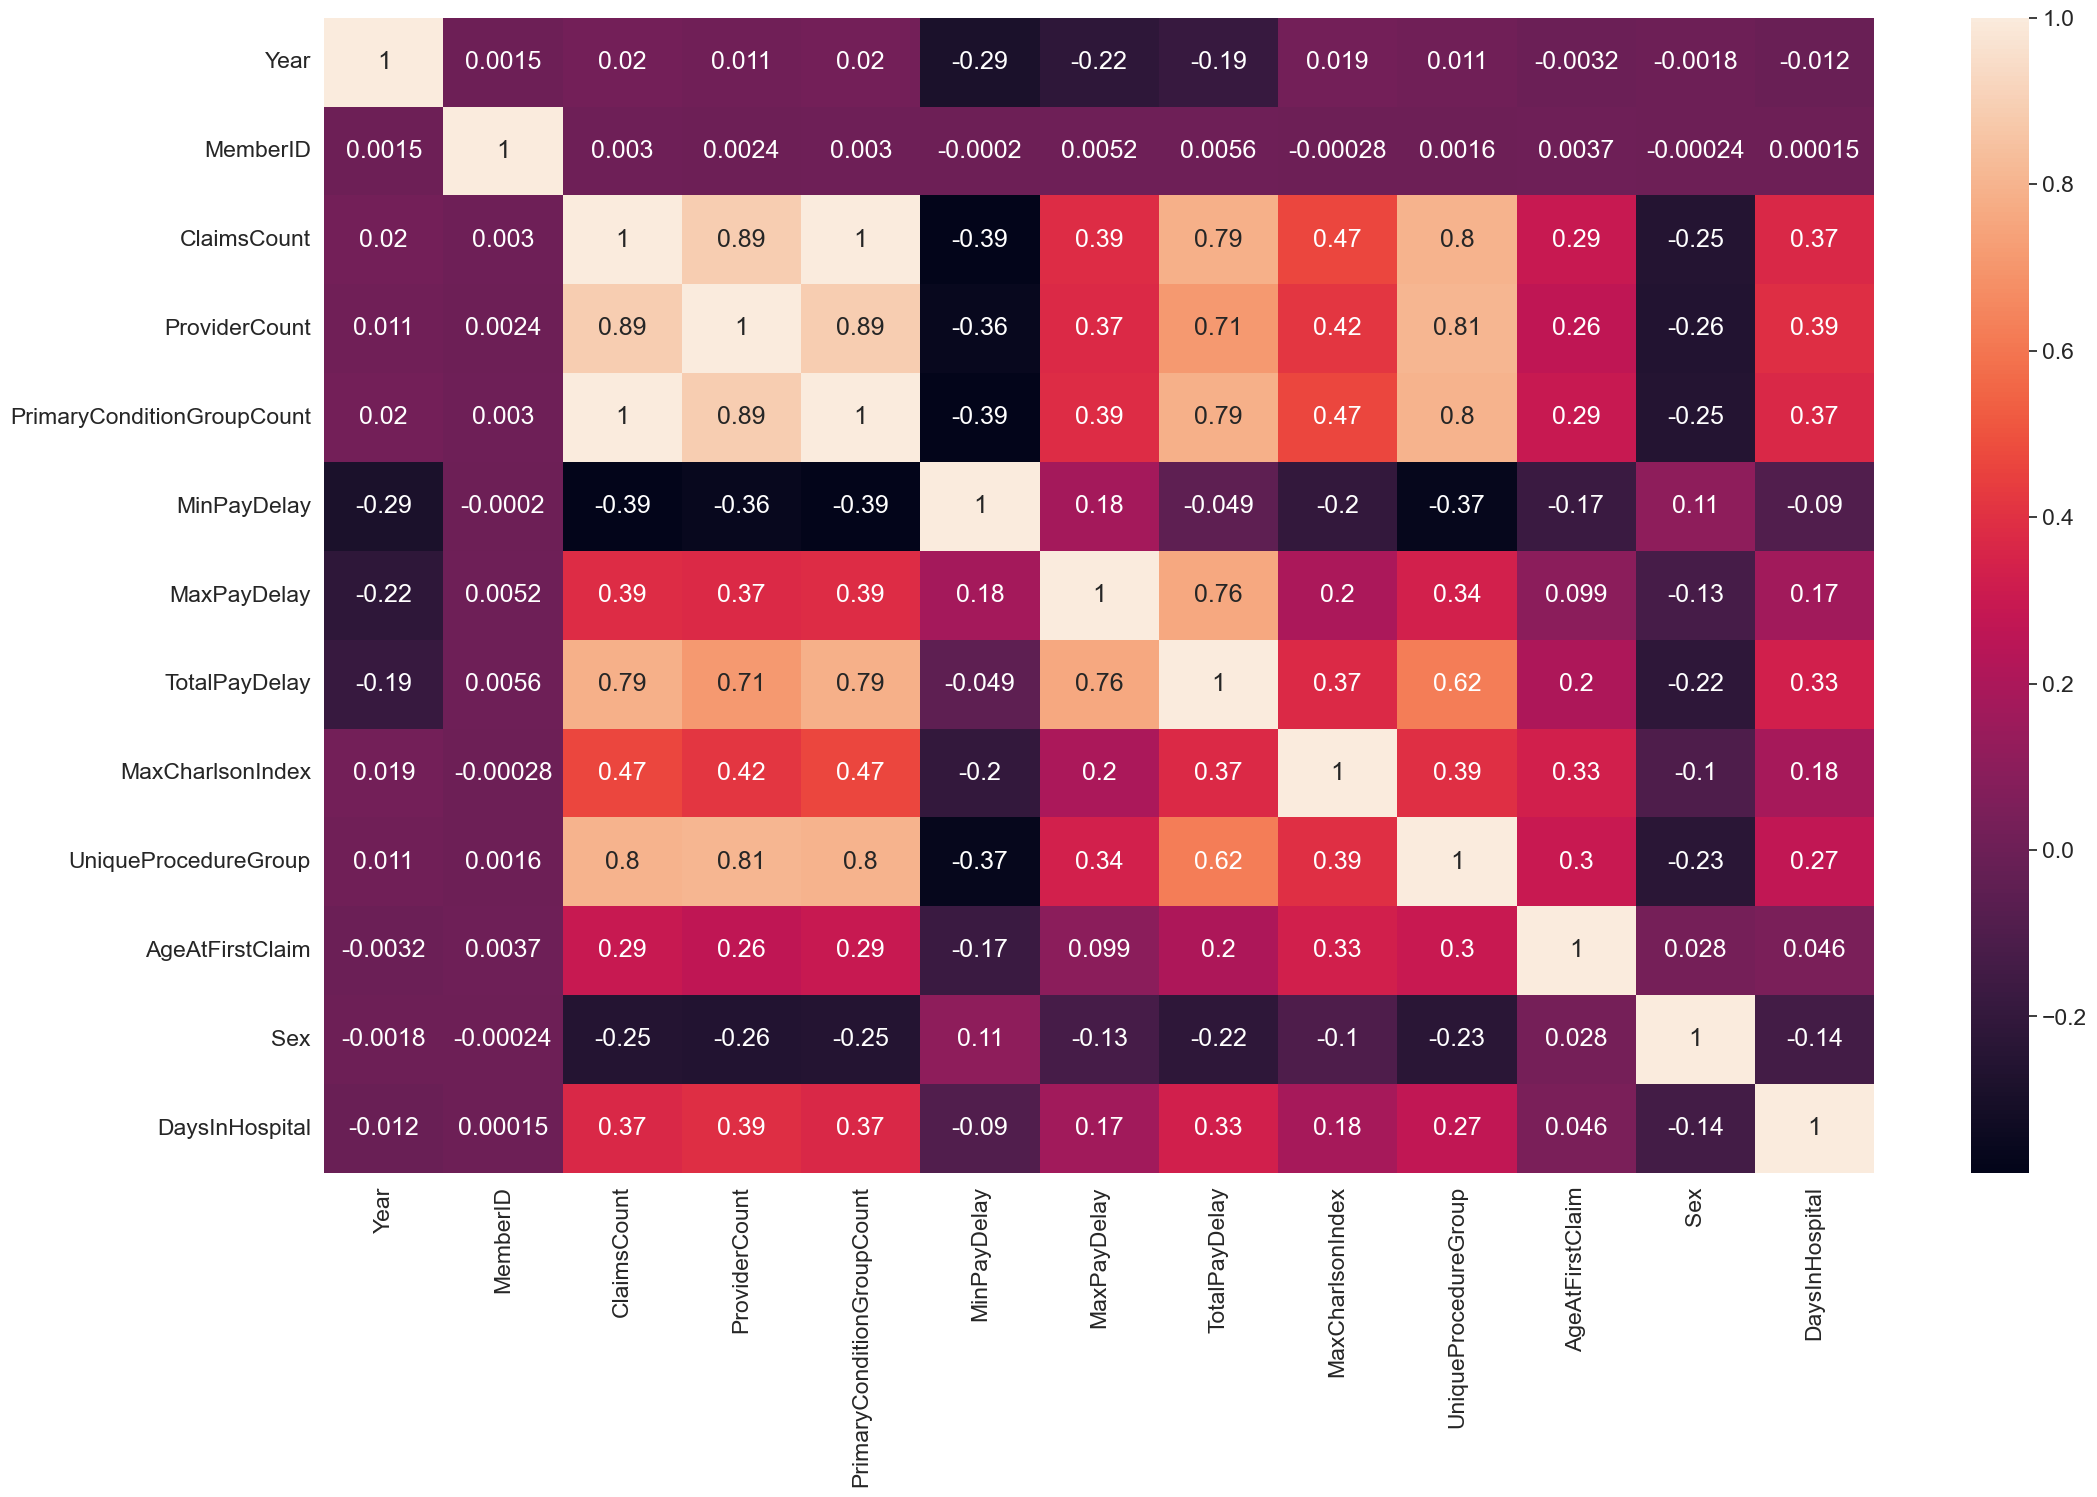

In [28]:
plt.figure(figsize=(25, 15))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='DaysInHospital', ylabel='Count'>

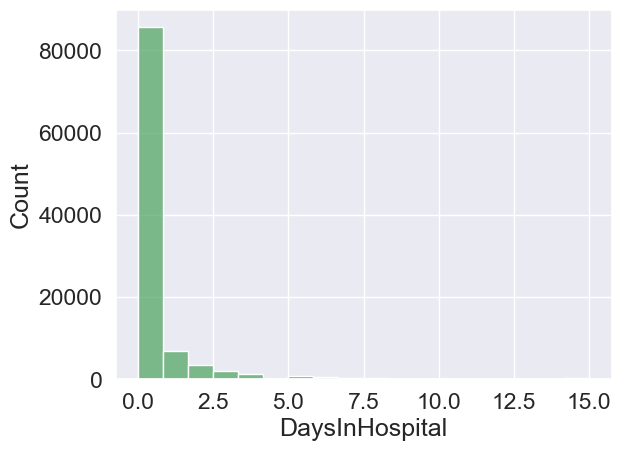

In [29]:
sns.histplot(data=df, x="DaysInHospital", color='g')

In [30]:
df["DaysInHospital"].value_counts()

0     85612
1      6834
2      3351
3      2083
4      1284
5       737
6       469
7       298
15      229
8       199
9       153
10      138
12       82
11       78
13       63
14       38
Name: DaysInHospital, dtype: int64

## Analysis

We are now gonna explore our own questions about the electronic health records data. One interesting thing to look at would be how many primary conditions people have on average in relation with their age. 

In [31]:
# Import seaborn
import seaborn as sns

In [32]:
counts = df["AgeAtFirstClaim"].value_counts()
counts

 70.0    19783
 60.0    13527
 40.0    12867
 50.0    11638
 80.0     8895
 30.0     8334
 0.0      7874
-1.0      7488
 10.0     7053
 20.0     4189
Name: AgeAtFirstClaim, dtype: int64

In [42]:
avg = df.groupby(['AgeAtFirstClaim']).mean().reset_index()

# After looking through the df above, we selected the most interesting features in the df below. 
avg = avg[["AgeAtFirstClaim", "PrimaryConditionGroupCount", "MaxCharlsonIndex", "DaysInHospital"]]
df_avg = avg.loc[avg['AgeAtFirstClaim'] != -1]
df_avg

,AgeAtFirstClaim,PrimaryConditionGroupCount,MaxCharlsonIndex,DaysInHospital
1,0.0,2.524765,0.279401,0.174752
2,10.0,2.486460,0.259464,0.164894
3,20.0,3.076868,0.241108,0.470041
4,30.0,3.279938,0.404008,0.319174
5,40.0,3.600451,0.606824,0.214580
6,50.0,4.080512,0.877986,0.262588
7,60.0,4.895173,1.298218,0.413691
8,70.0,5.542183,1.531113,0.590153
9,80.0,6.015177,1.668353,0.797077


<Axes: xlabel='AgeAtFirstClaim', ylabel='PrimaryConditionGroupCount'>

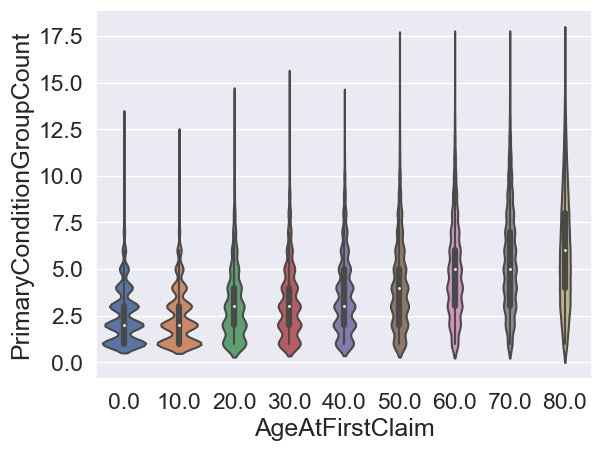

In [34]:
avg =  df[["AgeAtFirstClaim", "PrimaryConditionGroupCount", "MaxCharlsonIndex", "DaysInHospital"]]
avg = avg.loc[avg['AgeAtFirstClaim'] != -1]

sns.violinplot(data=avg, x="AgeAtFirstClaim", y="PrimaryConditionGroupCount")

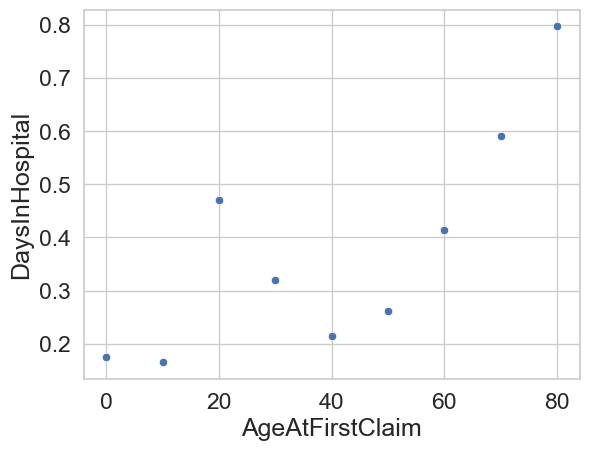

In [44]:
sns.set_style("whitegrid")
ax = sns.scatterplot(data=df_avg, x="AgeAtFirstClaim", y="DaysInHospital")

## Model Training

Splitting the data into training and test data

In [ ]:
# Old data split
df1 = df.loc[df['Year'] == 2]
df2 = df.loc[df['Year'] == 3]
index = len(df2)//3
df2_1 = df2[0:index]
df2_2 = df2[index:]
df_train = pd.concat([df1, df2_1])
df_test = df2_2


# Preparing for randomize split of data
features = df.drop(["DaysInHospital", "MemberID", "Year"], axis=1)
target = df["DaysInHospital"]

In [ ]:
# split a dataset into train and test sets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# split into train test sets
#X_train, X_test, y_train, y_test = df_train.drop(columns=['DaysInHospital', 'MemberID']), df_test.drop(columns=['DaysInHospital', 'MemberID']), df_train['DaysInHospital'], df_test['DaysInHospital']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Implementing official evaluation metric:

In [ ]:
def rmse(true, pred):
    return np.sqrt(np.mean(np.power(np.log(pred + 1) - np.log(true + 1), 2)))

<h3>Random Forest Classifier</h3>
Starting by testing a RFC-model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {'max_features': ['log2', 'sqrt'], 'ccp_alpha': [0, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1]}

# Finding best parameters with cross-validation
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5).fit(X_train, y_train)

bp = clf.best_params_
bp

In [ ]:
rfc = RandomForestClassifier(ccp_alpha=2*10**-5, max_features=bp['max_features']) # ccp_alpha=bp['ccp_alpha'], max_features=bp['max_features']
rfc.fit(X_train, y_train)

In [ ]:
train_preds_rfc = rfc.predict(X_train)
test_preds_rfc = rfc.predict(X_test)

print(f'Accuracy score on training-samples: {accuracy_score(y_train, train_preds_rfc)}')
print(f'Accuracy score on testing-samples: {accuracy_score(y_test, test_preds_rfc)}')
print()
print(f'Official RMSE score on training-samples: {rmse(y_train, train_preds_rfc)}')
print(f'Official RMSE score on testing-samples: {rmse(y_test, test_preds_rfc)}')
print()
np.unique(train_preds_rfc, return_counts=True)

<h3>Gradient Boosting Classifier</h3>
Now testing a boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
params = {'max_depth': [5, 6, 7, 8, 15], 
          'ccp_alpha': [0, 10**-6, 10**-5, 10**-4, 10**-3],
          'max_features': ['sqrt', 'log2']
         }

# Finding best parameters with cross-validation
clf = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, cv=5).fit(X_train, y_train)

bp = clf.best_params_
bp

In [ ]:
gb = GradientBoostingClassifier(max_depth=bp['max_depth'],
                                ccp_alpha=bp['ccp_alpha'],
                                max_features=bp['max_features']
                               )

gb.fit(X_train, y_train)

In [ ]:
train_preds_gb = gb.predict(X_train)
test_preds_gb = gb.predict(X_test)

print(f'Accuracy score on training-samples: {accuracy_score(y_train, train_preds_gb)}')
print(f'Accuracy score on testing-samples: {accuracy_score(y_test, test_preds_gb)}')
print()
print(f'Official RMSE score on training-samples: {rmse(y_train, train_preds_gb)}')
print(f'Official RMSE score on testing-samples: {rmse(y_test, test_preds_gb)}')
print()
np.unique(train_preds_gb, return_counts=True)